In [1]:
%load_ext autoreload
%autoreload 2

In [51]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import ghibtools as gh
import pandas as pd
import seaborn as sns
from params import *
from bibliotheque import get_pos, df_baseline, get_df_mask_chan_signif, keep_clean, cluster_stats
from compute_global_dataframes import bandpower_concat_job, oas_concat_job, bmrq_concat_job
from compute_psd import psd_baselined_job
from configuration import base_folder
import os
import scipy

In [3]:
mask_params = dict(markersize=15, markerfacecolor='y')

In [4]:
pos = get_pos()

In [5]:
metrics = ['power_mean','power_median','power_integral','relative_power']
indexes = ['band','session','chan','participant']

In [6]:
bandpower = bandpower_concat_job.get(global_key).to_dataframe()
bandpower = keep_clean(bandpower, metrics)

In [7]:
bandpower

dim_0 participant session chan             band  power_mean   
0          0         P01   music  Fp1            delta    2.678064  \
1          1         P01   music  Fp1            theta    4.123679   
2          2         P01   music  Fp1            alpha    5.392905   
3          3         P01   music  Fp1             beta    2.569195   
4          4         P01   music  Fp1        low_gamma    1.023265   
...      ...         ...     ...  ...              ...         ...   
13015  13015         P31    odor  Fp2            alpha    1.170172   
13016  13016         P31    odor  Fp2             beta    1.504186   
13017  13017         P31    odor  Fp2        low_gamma    1.533565   
13018  13018         P31    odor  Fp2       high_gamma    1.357157   
13019  13019         P31    odor  Fp2  very_high_gamma    1.384126   

       power_median  power_integral  relative_power  stai_state  stai_trait   
0          2.724801        8.105543        3.654582          40          61  \
1          4.115048       16.607378        7.487841          40          61   
2          5.489301       21.597757        9.737875          40          61   
3          1.767221       46.065710       20.769848          40          61   
4          1.014014       15.342220        6.917414          40          61   
...             ...             ...             ...         ...         ...   
13015      1.161080        4.675973        3.868772          29          40   
13016      1.529955       27.108012       22.428428          29          40   
13017      1.519889       23.024222       19.049612          29          40   
13018      1.360305       61.030396       50.494881          29          40   
13019      1.376177      138.397370      114.506201          29          40   

       keep_session Gender  Maia_Mean       OAS      BMRQ  
0                 1      F   1.019643  2.666667  2.727273  
1                 1      F   1.019643  2.666667  2.727273  
2                 1      F   1.019643  2.666667  2.727273  
3                 1      F   1.019643  2.666667  2.727273  
4                 1      F   1.019643  2.666667  2.727273  
...             ...    ...        ...       ...       ...  
13015             1      M   2.790774  2.933333  2.681818  
13016             1      M   2.790774  2.933333  2.681818  
13017             1      M   2.790774  2.933333  2.681818  
13018             1      M   2.790774  2.933333  2.681818  
13019             1      M   2.790774  2.933333  2.681818  

[13020 rows x 16 columns]

<AxesSubplot: >

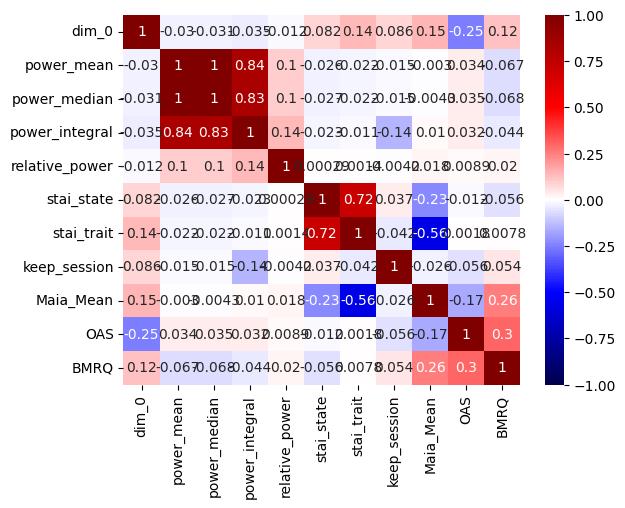

In [8]:
sns.heatmap(bandpower.corr(numeric_only = True), annot =True, vmin = -1, vmax = 1, cmap = 'seismic')

<AxesSubplot: xlabel='band', ylabel='power_integral'>

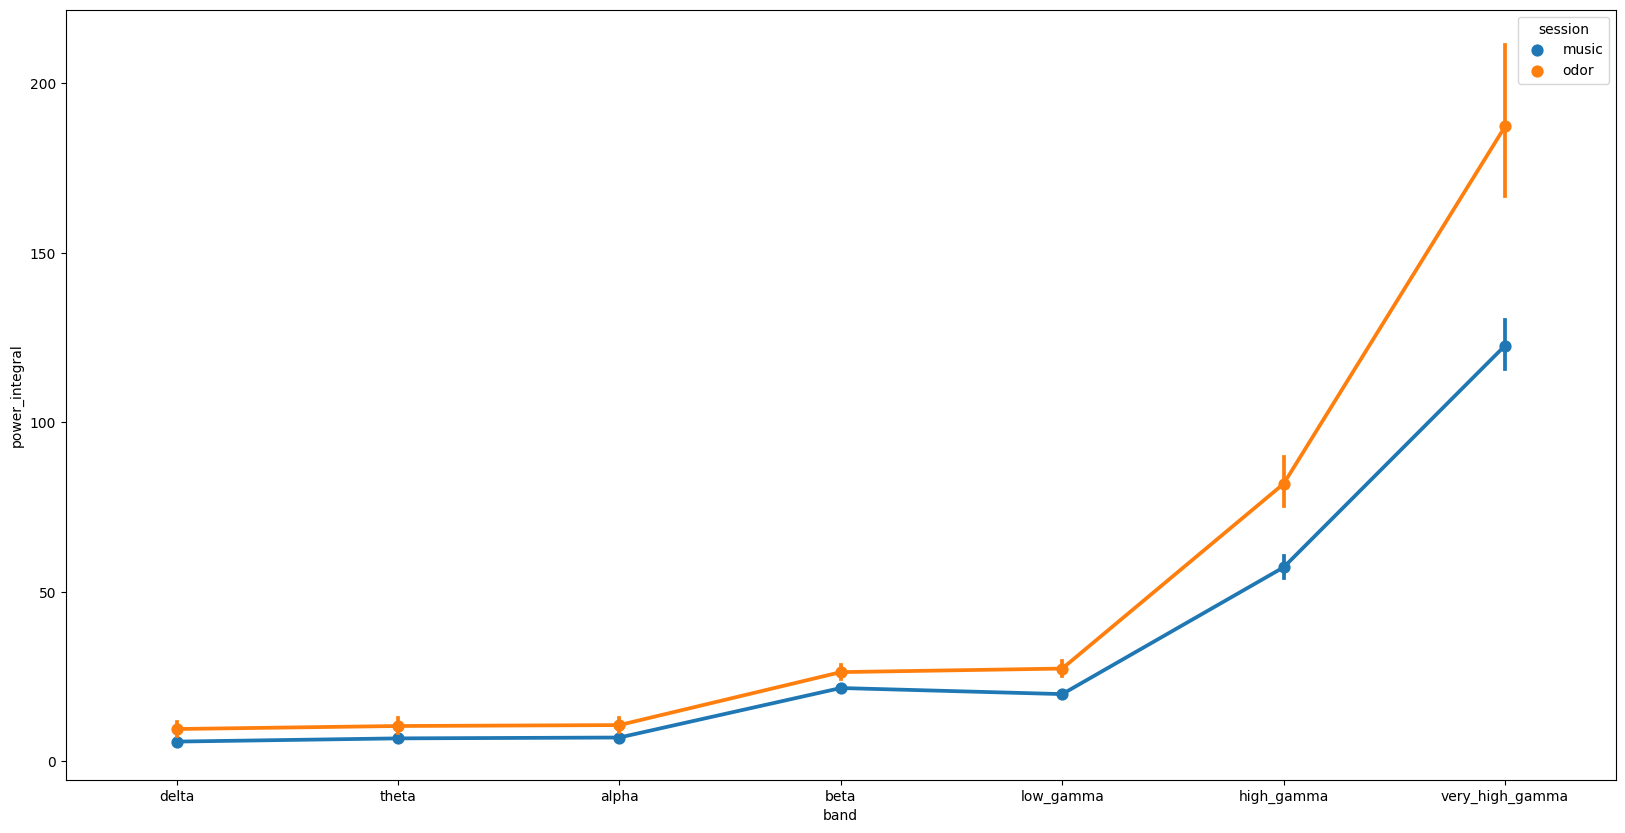

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=bandpower, x = 'band', y = 'power_integral', hue = 'session',ax=ax)

In [10]:
bandpower

dim_0 participant session chan             band  power_mean   
0          0         P01   music  Fp1            delta    2.678064  \
1          1         P01   music  Fp1            theta    4.123679   
2          2         P01   music  Fp1            alpha    5.392905   
3          3         P01   music  Fp1             beta    2.569195   
4          4         P01   music  Fp1        low_gamma    1.023265   
...      ...         ...     ...  ...              ...         ...   
13015  13015         P31    odor  Fp2            alpha    1.170172   
13016  13016         P31    odor  Fp2             beta    1.504186   
13017  13017         P31    odor  Fp2        low_gamma    1.533565   
13018  13018         P31    odor  Fp2       high_gamma    1.357157   
13019  13019         P31    odor  Fp2  very_high_gamma    1.384126   

       power_median  power_integral  relative_power  stai_state  stai_trait   
0          2.724801        8.105543        3.654582          40          61  \
1          4.115048       16.607378        7.487841          40          61   
2          5.489301       21.597757        9.737875          40          61   
3          1.767221       46.065710       20.769848          40          61   
4          1.014014       15.342220        6.917414          40          61   
...             ...             ...             ...         ...         ...   
13015      1.161080        4.675973        3.868772          29          40   
13016      1.529955       27.108012       22.428428          29          40   
13017      1.519889       23.024222       19.049612          29          40   
13018      1.360305       61.030396       50.494881          29          40   
13019      1.376177      138.397370      114.506201          29          40   

       keep_session Gender  Maia_Mean       OAS      BMRQ  
0                 1      F   1.019643  2.666667  2.727273  
1                 1      F   1.019643  2.666667  2.727273  
2                 1      F   1.019643  2.666667  2.727273  
3                 1      F   1.019643  2.666667  2.727273  
4                 1      F   1.019643  2.666667  2.727273  
...             ...    ...        ...       ...       ...  
13015             1      M   2.790774  2.933333  2.681818  
13016             1      M   2.790774  2.933333  2.681818  
13017             1      M   2.790774  2.933333  2.681818  
13018             1      M   2.790774  2.933333  2.681818  
13019             1      M   2.790774  2.933333  2.681818  

[13020 rows x 16 columns]

In [11]:
bandpower_mean = bandpower.groupby(['session','chan','band']).median(True).reset_index()

In [12]:
bandpower_mean.columns

Index(['session', 'chan', 'band', 'dim_0', 'power_mean', 'power_median',
       'power_integral', 'relative_power', 'stai_state', 'stai_trait',
       'keep_session', 'Maia_Mean', 'OAS', 'BMRQ'],
      dtype='object')

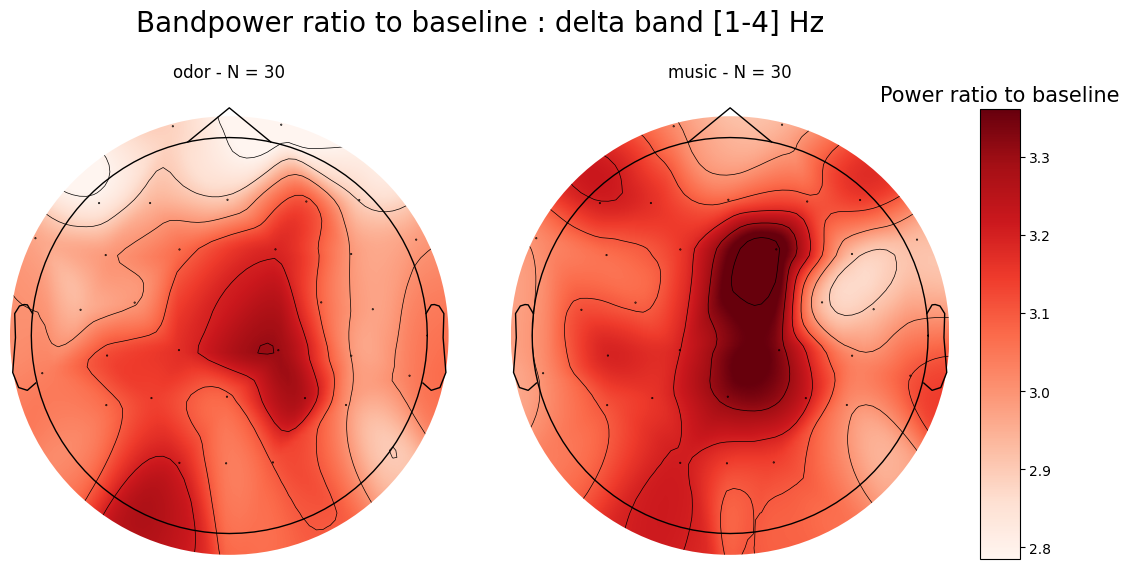

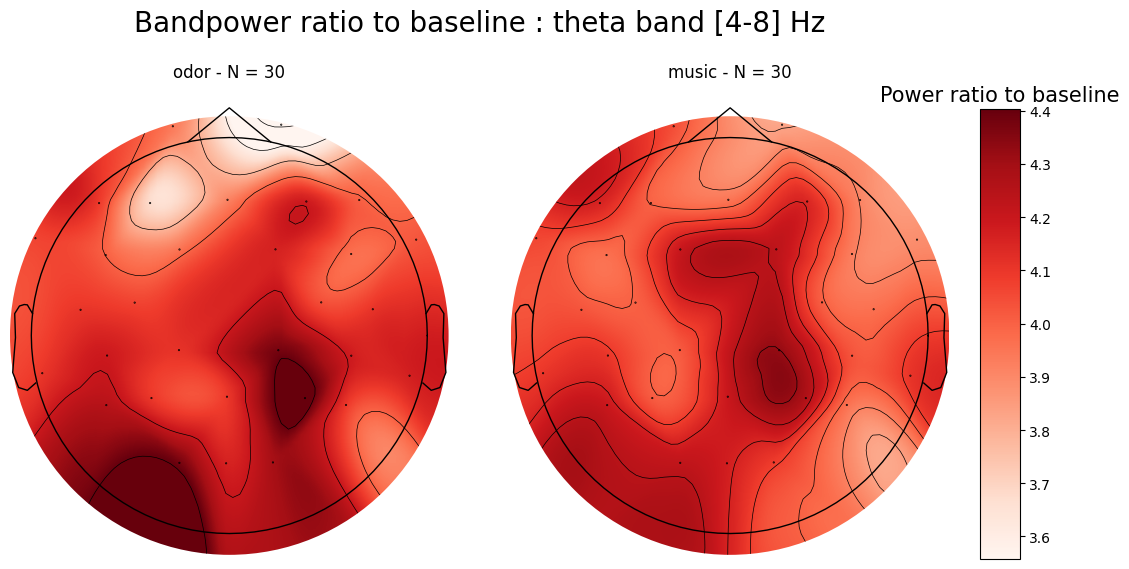

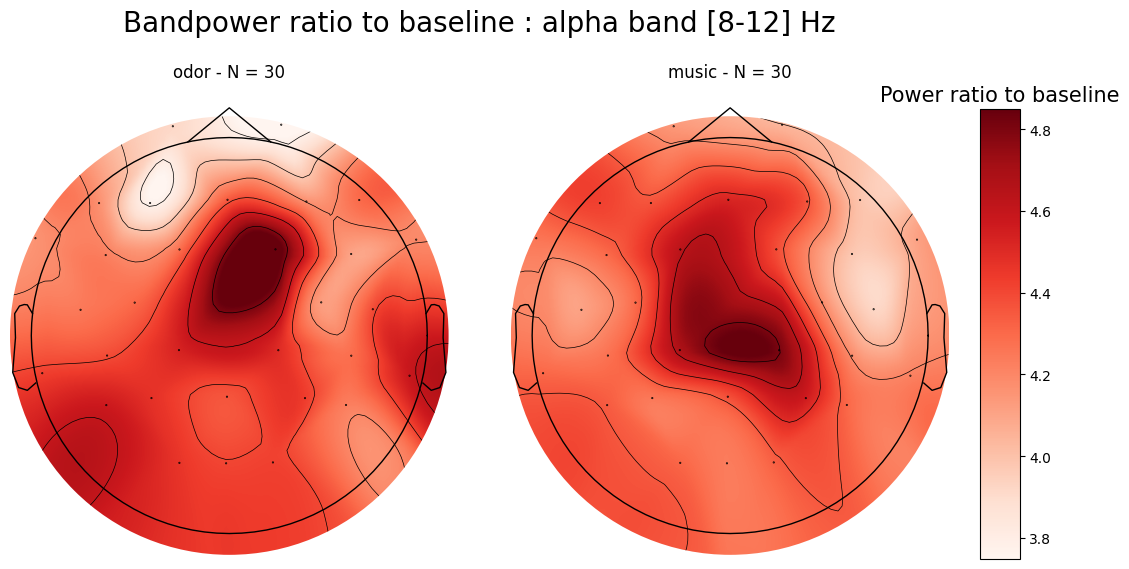

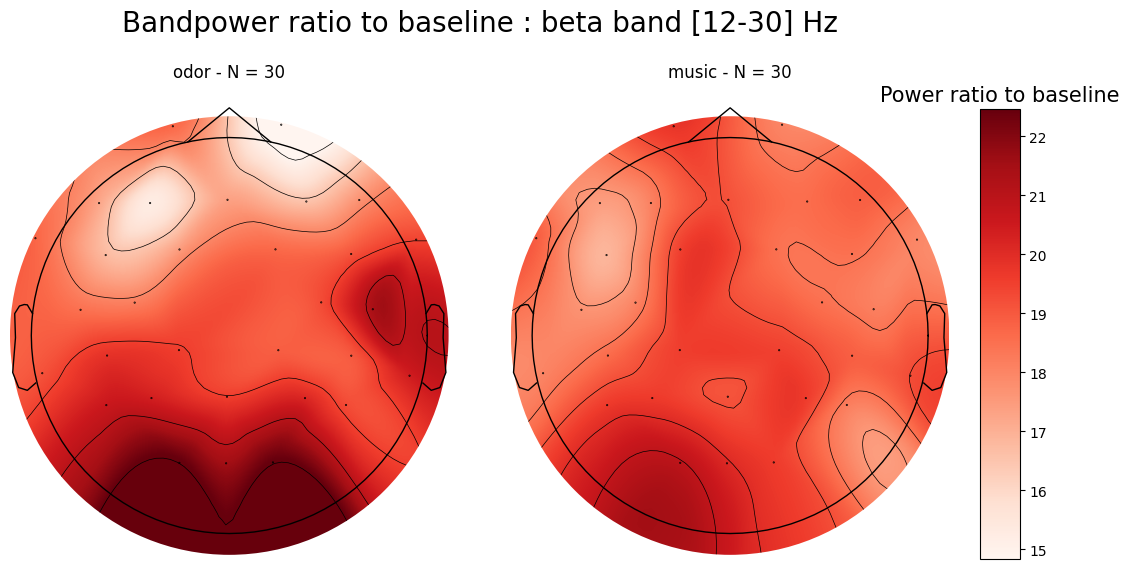

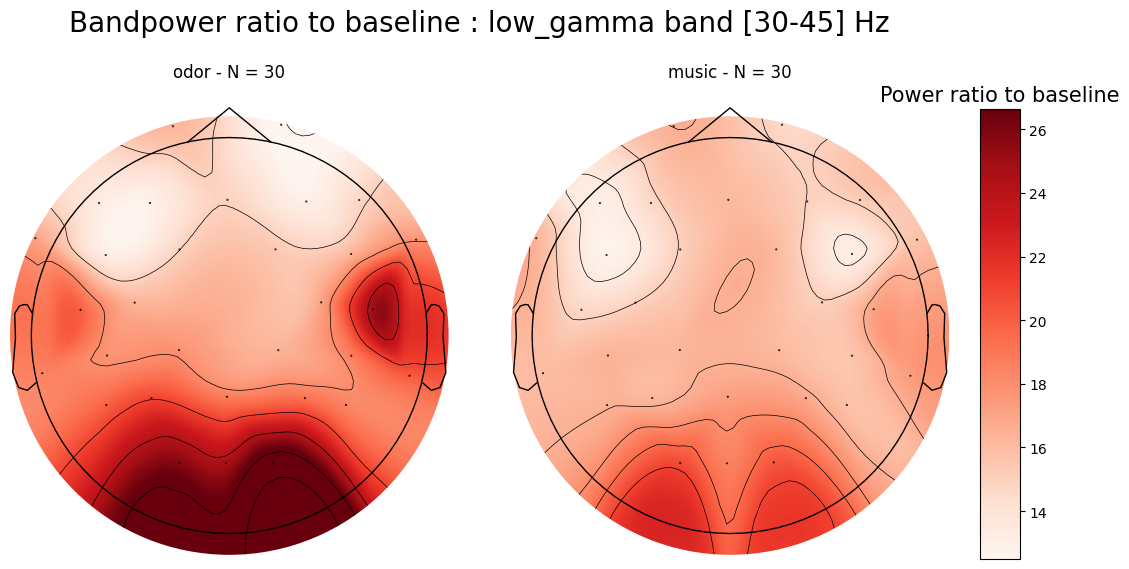

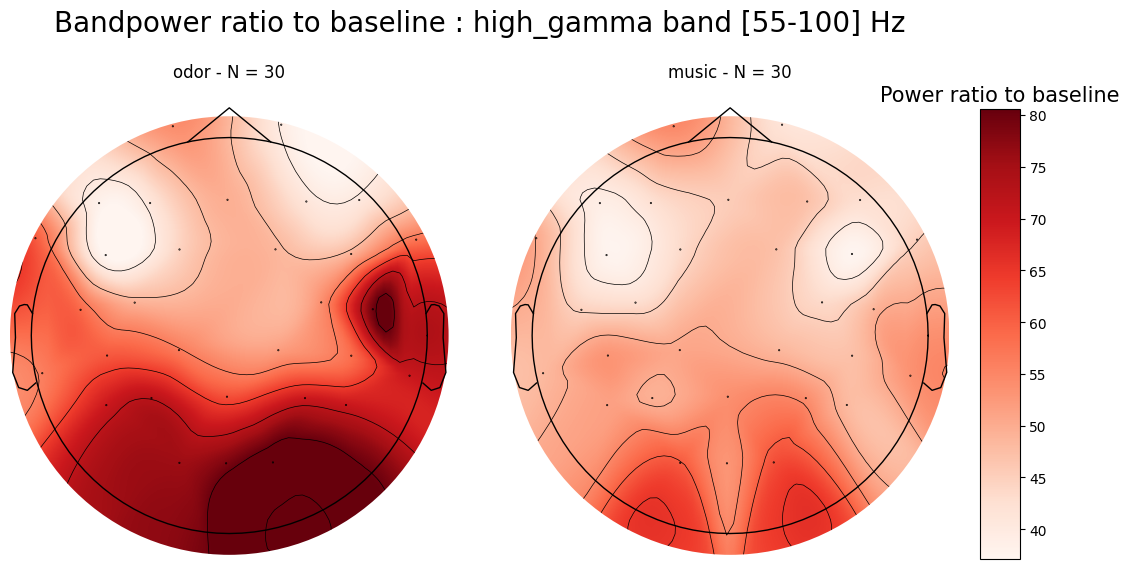

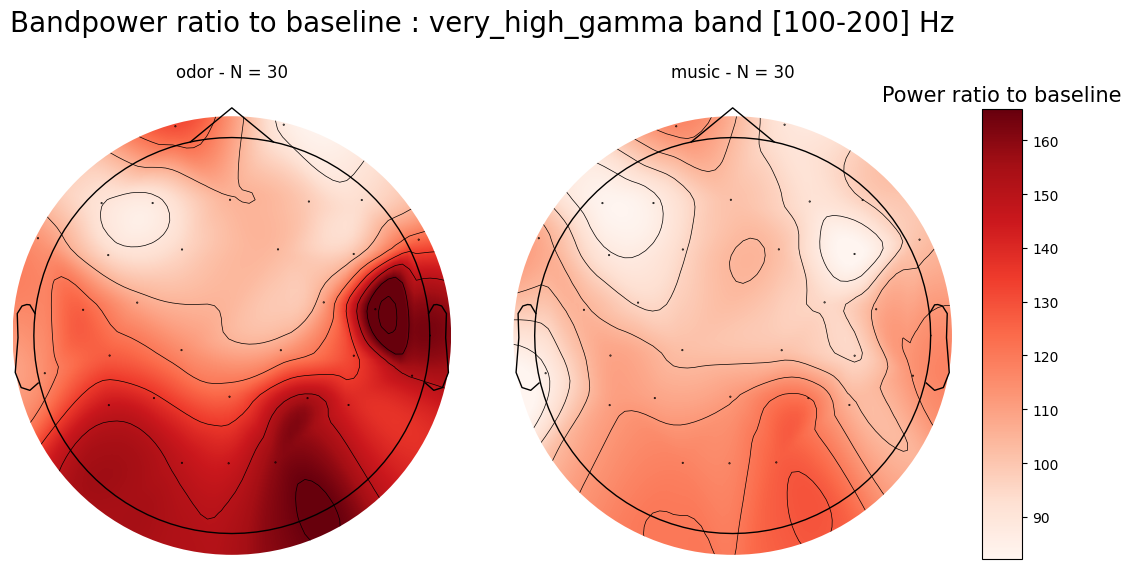

In [13]:
metric = 'power_integral'

N = len(subject_keys)

for band in fbands.keys():
    bandpower_of_band_sub = bandpower[bandpower['band'] == band]
    df_mask = get_df_mask_chan_signif(df = bandpower_of_band_sub, chans = eeg_chans, predictor = 'session', outcome = metric, subject = 'participant')
    
    bandpower_of_band = bandpower_mean[bandpower_mean['band'] == band]
    
    lc = fbands[band][0]
    hc = fbands[band][1]
    
    delta = 0.01
    mini = bandpower_of_band[metric].quantile(delta)
    maxi = bandpower_of_band[metric].quantile(1 - delta)
    
    vlim = (mini,maxi)

    fig, axs = plt.subplots(ncols = bandpower_of_band['session'].unique().size,figsize = (10,5), constrained_layout = True)
    fig.suptitle(f'Bandpower ratio to baseline : {band} band [{lc}-{hc}] Hz', fontsize = 20, y = 1.1)
    for c, session in enumerate(['odor','music']):
        ax = axs[c]
        mask = bandpower_of_band[bandpower_of_band['session'] == session]
        data_ready = mask.groupby('chan').mean(numeric_only = True)[metric].reindex(eeg_chans)
        data = data_ready.values
        im, _ = mne.viz.plot_topomap(data=data,pos = pos, names = eeg_chans, axes=ax, show = False, vlim=vlim, cmap = 'Reds', mask = df_mask['mask_corr'], mask_params = mask_params)
        
        ax.set_title(f'{session} - N = {N}')
        
    ax_x_start = 1
    ax_x_width = 0.04
    ax_y_start = 0
    ax_y_height = 0.9
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    clb = fig.colorbar(im, cax=cbar_ax)
    clb.ax.set_title('Power ratio to baseline',fontsize=15)
    
    file = base_folder / 'Figures' / 'bandpower' / 'global' / f'{band}.png'
    

    fig.savefig(file, bbox_inches = 'tight')


/tmp/ipykernel_4660/621574015.py:6: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(X, out_type = 'indices', verbose = False)


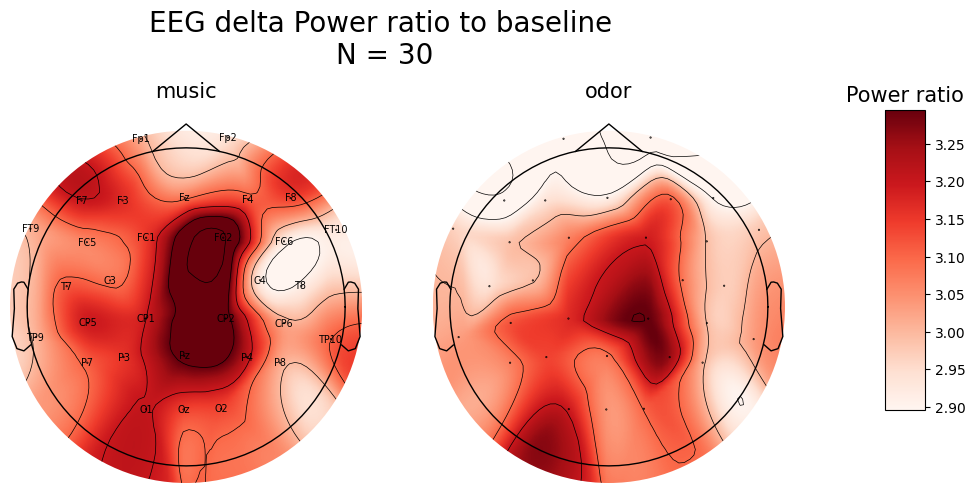

/tmp/ipykernel_4660/621574015.py:6: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(X, out_type = 'indices', verbose = False)


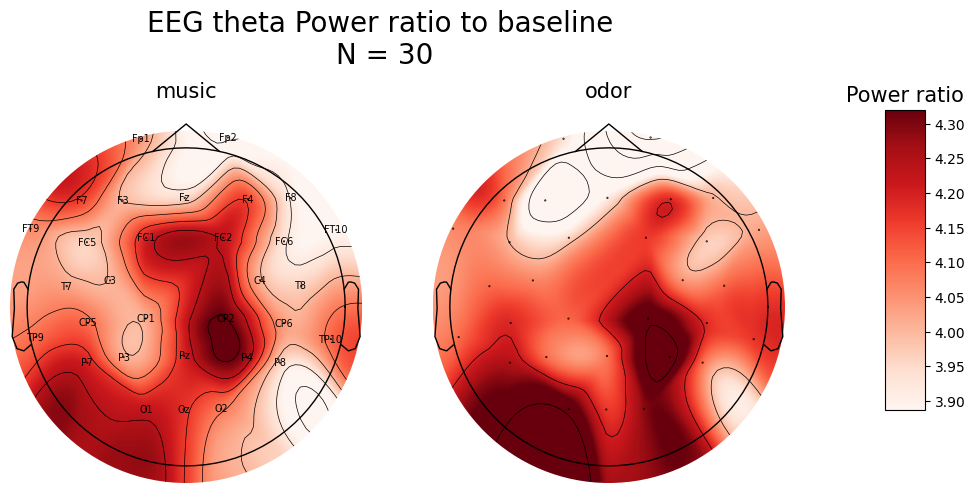

/tmp/ipykernel_4660/621574015.py:6: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(X, out_type = 'indices', verbose = False)


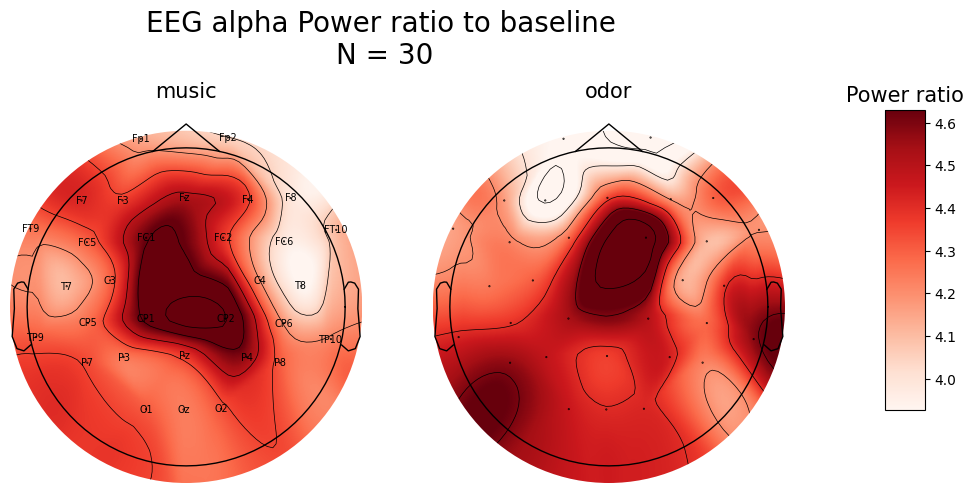

/tmp/ipykernel_4660/621574015.py:6: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(X, out_type = 'indices', verbose = False)


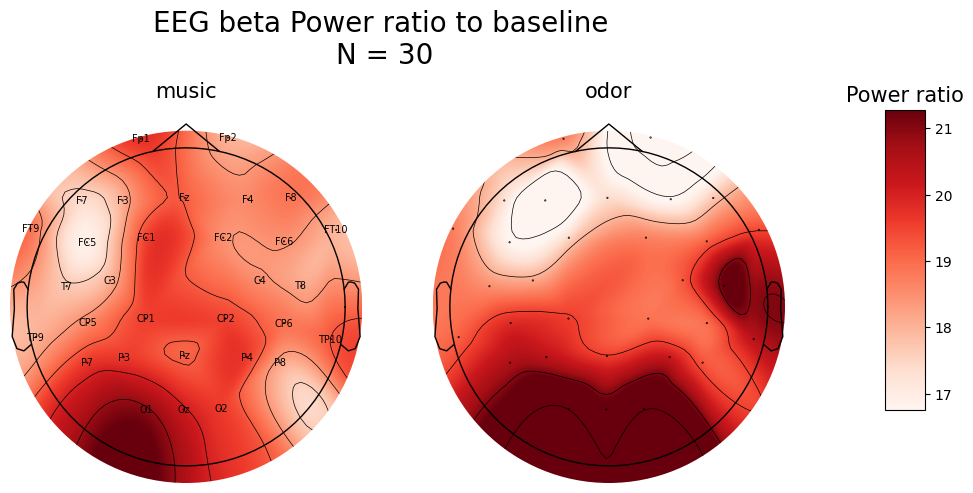

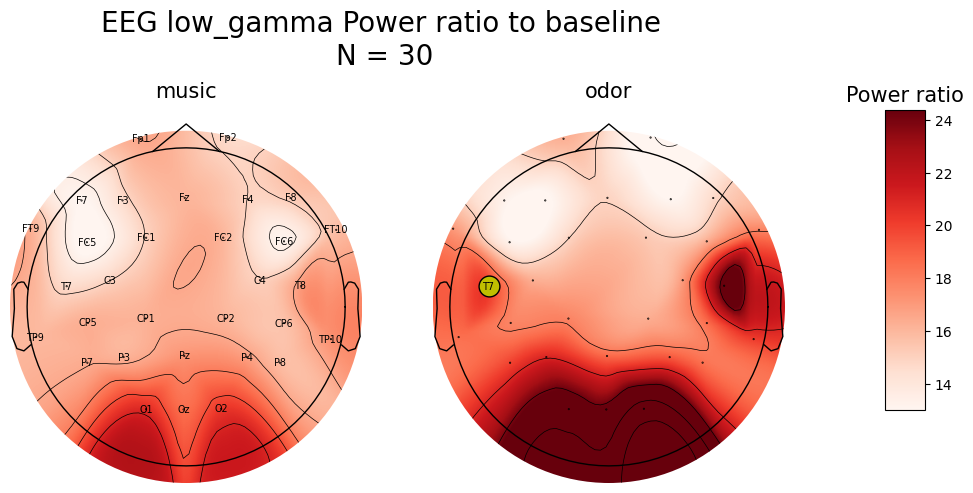

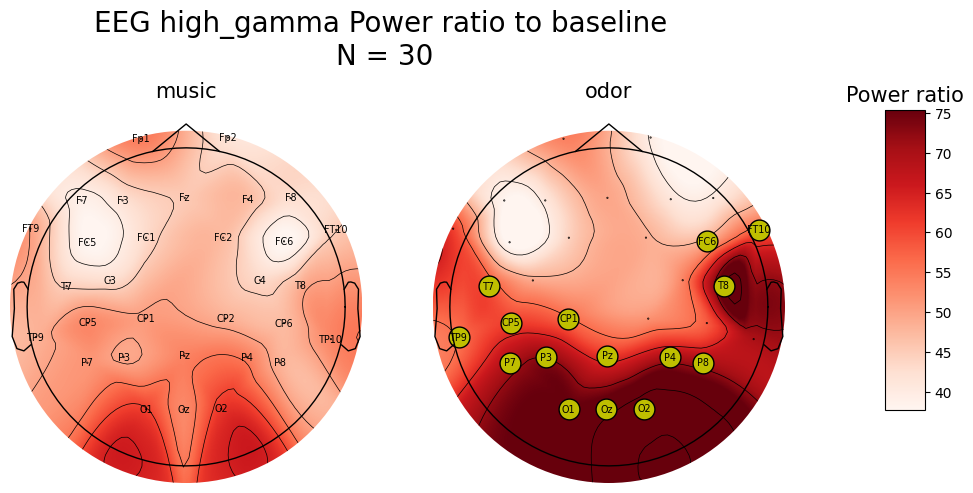

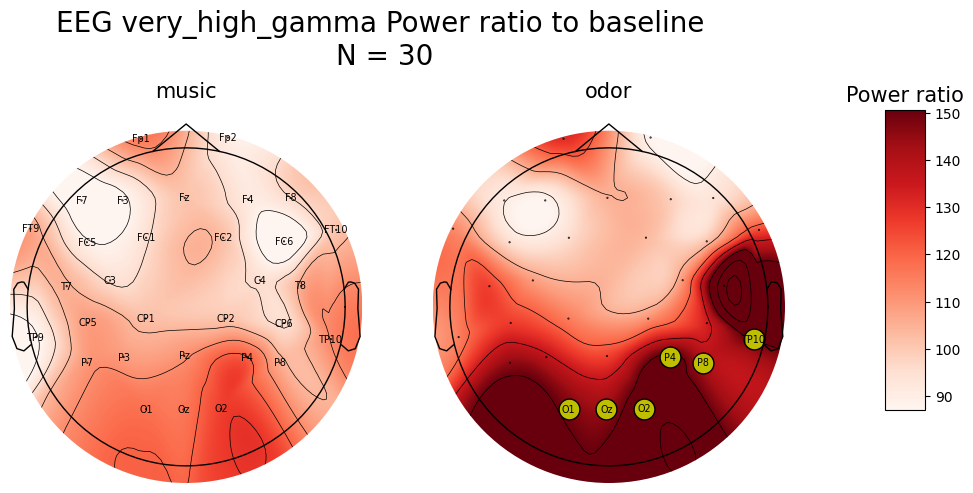

In [30]:
import xarray as xr
import ghibtools as gh

def cluster_stats(x1,x2, chans):
    X = x2 - x1
    t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(X, out_type = 'indices', verbose = False)

    mask_signif_chans = np.full(len(ch_names), False)

    chan_inds_signif = []
    for cluster, p  in zip(clusters, cluster_p_values):
        if p < 0.05:
            chan_inds_signif.extend(list(cluster[0]))
    mask_signif_chans[chan_inds_signif] = True
    return  mask_signif_chans

metric = 'power_integral'

bandpower = bandpower_concat_job.get(global_key).to_dataframe()
bandpower = keep_clean(bandpower, metrics)

for band in fbands.keys():
    df = bandpower[bandpower['band'] == band]

    ch_names = df['chan'].unique()
    da = gh.init_da({'session':df['session'].unique(), 'participant':df['participant'].unique(), 'chan':ch_names})
    for ses in da['session'].values:
        for participant in da['participant'].values:
            for chan in da['chan'].values:
                da.loc[ses,participant,chan] = df.set_index(['session','participant','chan']).loc[(ses,participant,chan),metric]

    q_diff = 0.05

    mask_params = dict(markersize=15, markerfacecolor='y')

    N = df['participant'].unique().size

    vmin = df.groupby(['session','chan']).median(numeric_only = True)[metric].quantile(q_diff)
    vmax = df.groupby(['session','chan']).median(numeric_only = True)[metric].quantile(1 - q_diff)

    fig, axs = plt.subplots(ncols = df['session'].unique().size, figsize = (10,5))
    fig.suptitle(f'EEG {band} Power ratio to baseline \nN = {N}', fontsize = 20, y = 1.1)

    chans = da['chan'].values

    for c, session in enumerate(df['session'].unique()):
        ax = axs[c]
        topo_data = df[df['session'] == session].groupby('chan').median(numeric_only = True)[metric].reindex(chans)
        
        if c ==0:
            im, cn = mne.viz.plot_topomap(data = topo_data.values , pos = pos, names = chans, axes = ax, show = False, vlim = (vmin,vmax))
        else:
            x1 = da.sel(session = 'odor').values
            x2 = da.sel(session = 'music').values
            mask = cluster_stats(x1,x2,chans)
            im, cn = mne.viz.plot_topomap(data = topo_data.values , pos = pos, names = chans, axes = ax, show = False, vlim = (vmin,vmax), mask = mask, mask_params = mask_params)
        ax.set_title(f'{session}', fontsize = 15)

    ax_x_start = 1
    ax_x_width = 0.04
    ax_y_start = 0.3
    ax_y_height = 0.6
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    clb = fig.colorbar(im, cax=cbar_ax)
    clb.ax.set_title('Power ratio',fontsize=15)

    fig.savefig(base_folder / 'Figures' / 'bandpower' / 'global' / f'{band}_cluster_stats.png', dpi = 300, bbox_inches = 'tight')

    plt.show()

In [14]:
oas = oas_concat_job.get(global_key).to_dataframe().set_index('participant')
bmrq = bmrq_concat_job.get(global_key).to_dataframe().set_index('participant')

In [15]:
N = len(subject_keys)

for subject in subject_keys:
    bandpower_subject = bandpower[bandpower['participant'] == subject]
    bmrq_sub = bmrq.loc[subject, 'BMRQ'].round(3)
    oas_sub = oas.loc[subject, 'OAS'].round(3)
    for band in fbands.keys():
        bandpower_of_band = bandpower_subject[bandpower_subject['band'] == band]

        lc = fbands[band][0]
        hc = fbands[band][1]

        delta = 0.05
        mini = bandpower_of_band['power_integral'].quantile(delta)
        maxi = bandpower_of_band['power_integral'].quantile(1 - delta)
        vlim = (mini,maxi)

        fig, axs = plt.subplots(ncols = bandpower_of_band['session'].unique().size,figsize = (10,5), constrained_layout = True)
        fig.suptitle(f'{subject} - Bandpower ratio to baseline : {band} band [{lc}-{hc}] Hz \n OAS : {oas_sub} - BMRQ : {bmrq_sub}', fontsize = 20, y = 1.1)
        for c, session in enumerate(['odor','music']):
            ax = axs[c]
            mask = bandpower_of_band[bandpower_of_band['session'] == session]
            data_ready = mask.groupby('chan').mean(numeric_only = True)['power_integral'].reindex(eeg_chans)
            data = data_ready.values
            im, _ = mne.viz.plot_topomap(data=data,pos = pos, names = eeg_chans, axes=ax, show = False, vlim=vlim, cmap = 'Reds')

            ax.set_title(f'{session}')

        ax_x_start = 1
        ax_x_width = 0.04
        ax_y_start = 0
        ax_y_height = 0.9
        cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
        clb = fig.colorbar(im, cax=cbar_ax)
        clb.ax.set_title('Power ratio to baseline',fontsize=15)
        
        save_folder = base_folder / 'Figures' / 'bandpower' / 'by_subject' / f'{band}'
        if not os.path.isdir(save_folder):
            os.mkdir(save_folder)
            
        file = save_folder / f'{subject}.png'
        fig.savefig(file, bbox_inches = 'tight')
        plt.close()

# PSDs

In [16]:
psds = None

for sub in subject_keys:
    for ses in ['odor','music']:
        key = f'{sub}_{ses}'
        psd = psd_baselined_job.get(key)['psd_baselined']
        
        if psds is None:
            psds = gh.init_da({'participant':subject_keys, 'session':['odor','music'], 'chan':psd['chan'].values, 'freq':psd['freq'].values})
        psds.loc[sub, ses, : ,:] = psd

In [17]:
for chan in eeg_chans:
    psds_chan = psds.sel(chan = chan, freq = slice(1,30))
    f = psds_chan['freq'].values
    sds = psds_chan.std(dim = 'participant')
    ms = psds_chan.mean(dim = 'participant')

    fig, ax = plt.subplots(figsize = (15,5))

    for ses in ['odor','music']:
        m =  ms.sel(session = ses).values
        sd =  sds.sel(session = ses).values
        ax.plot(f, m, lw = 1, label = ses)
        ax.fill_between(f, m-sd , m + sd, alpha = 0.2)
    ax.set_xlabel('Freq [Hz]')
    ax.set_ylabel('Power ratio to baseline')
    ax.set_title(f'Power ratio to baseline in electrode {chan}', fontsize = 20)
    ax.legend()
    
    fig.savefig(base_folder / 'Figures' / 'bandpower' / 'psds' / f'{chan}.png', bbox_inches = 'tight')
    plt.close()

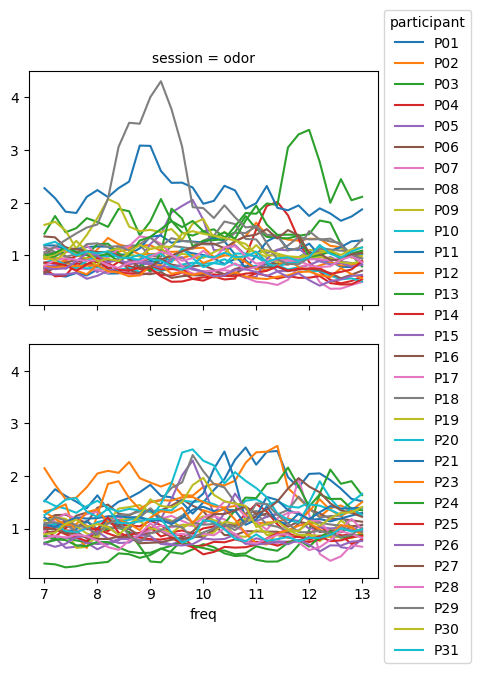

In [18]:
psds.sel(chan = 'F3', freq = slice(7,13)).plot.line(x = 'freq', hue = 'participant', row = 'session')

In [31]:
psds

<xarray.DataArray (participant: 30, session: 2, chan: 31, freq: 2501)>
array([[[[1.15815064e+00, 9.34374513e-01, 7.67650794e-01, ...,
          4.09839673e-01, 5.12308718e-01, 4.29537791e-01],
         [2.02528038e+00, 2.02456441e+00, 1.91422008e+00, ...,
          5.50373700e-01, 8.11387510e-01, 8.73672049e-01],
         [1.44546064e+00, 1.25535707e+00, 9.16417964e-01, ...,
          7.20448081e-01, 5.88280693e-01, 6.28745462e-01],
         ...,
         [2.76769658e+00, 2.44567436e+00, 2.40012376e+00, ...,
          4.85065989e-01, 5.25092744e-01, 5.35453152e-01],
         [3.54242887e+00, 3.67412609e+00, 3.28022012e+00, ...,
          2.25669795e+00, 2.16795223e+00, 4.30935635e+00],
         [1.54751476e+00, 1.60572211e+00, 1.33967953e+00, ...,
          1.14807290e+00, 1.18703632e+00, 9.11711378e-01]],

        [[1.27718597e+00, 1.29305862e+00, 1.36464040e+00, ...,
          1.40830569e+00, 1.39872392e+00, 9.76684272e-01],
         [1.76431206e+00, 2.04076294e+00, 1.95534391e+00, ...,
          1.33460933e+00, 1.08888201e+00, 8.84032413e-01],
         [2.01230282e+00, 1.68964479e+00, 1.70050295e+00, ...,
          1.76110986e+00, 2.08224842e+00, 2.53254970e+00],
...
         [7.25495108e-01, 7.82912481e-01, 7.26829549e-01, ...,
          9.07635081e-01, 7.86353875e-01, 9.35662317e-01],
         [5.46059025e-01, 7.48750776e-01, 7.08154237e-01, ...,
          1.44705592e+00, 1.63800573e+00, 1.51218810e+00],
         [4.83802418e-01, 4.77525701e-01, 6.27563098e-01, ...,
          6.15746075e-01, 5.09929203e-01, 4.76717945e-01]],

        [[6.32286650e-01, 6.59213211e-01, 6.30308341e-01, ...,
          4.28464490e+00, 3.56782741e+00, 3.41320453e+00],
         [9.77550392e-01, 1.02736064e+00, 8.91748110e-01, ...,
          9.19779060e-01, 5.50550076e-01, 4.00718460e-01],
         [9.66472870e-01, 9.20831929e-01, 7.70630559e-01, ...,
          8.23788315e-01, 7.46028502e-01, 6.59563575e-01],
         ...,
         [6.40382477e-01, 6.37665190e-01, 5.98998126e-01, ...,
          8.21198725e-01, 8.72591315e-01, 8.29272514e-01],
         [8.26233398e-01, 8.89118870e-01, 9.27711485e-01, ...,
          4.98335833e+00, 5.11500563e+00, 4.36853979e+00],
         [4.20621106e-01, 4.59516093e-01, 5.12493438e-01, ...,
          8.38058344e-02, 1.05256498e-01, 1.12945361e-01]]]])
Coordinates:
  * participant  (participant) <U3 'P01' 'P02' 'P03' 'P04' ... 'P29' 'P30' 'P31'
  * session      (session) <U5 'odor' 'music'
  * chan         (chan) object 'Fp1' 'Fz' 'F3' 'F7' ... 'FC2' 'F4' 'F8' 'Fp2'
  * freq         (freq) float64 0.0 0.2 0.4 0.6 0.8 ... 499.4 499.6 499.8 500.0

In [97]:
f_start = 1
f_stop = 400

chan = 'T7'

x1 = psds.sel(chan =chan , freq = slice(f_start, f_stop), session = 'music')
x2 = psds.sel(chan =chan , freq = slice(f_start, f_stop), session = 'odor')
t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(x1.values-x2.values, out_type = 'indices', verbose = True)

Using a threshold of 2.045230
stat_fun(H1): min=-3.035033 max=1.320556
Running initial clustering …
Found 7 clusters


  0%|          | Permuting : 0/1023 [00:00<?,       ?it/s]

/tmp/ipykernel_4660/4090582623.py:25: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(x1.values-x2.values, out_type = 'indices', verbose = False)
/tmp/ipykernel_4660/4090582623.py:25: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(x1.values-x2.values, out_type = 'indices', verbose = False)
/tmp/ipykernel_4660/4090582623.py:25: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(x1.values-x2.values, out_type = 'indices', verbose = False)
/tmp/ipykernel_4660/4090582623.py:25: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(x1.values-x2.val

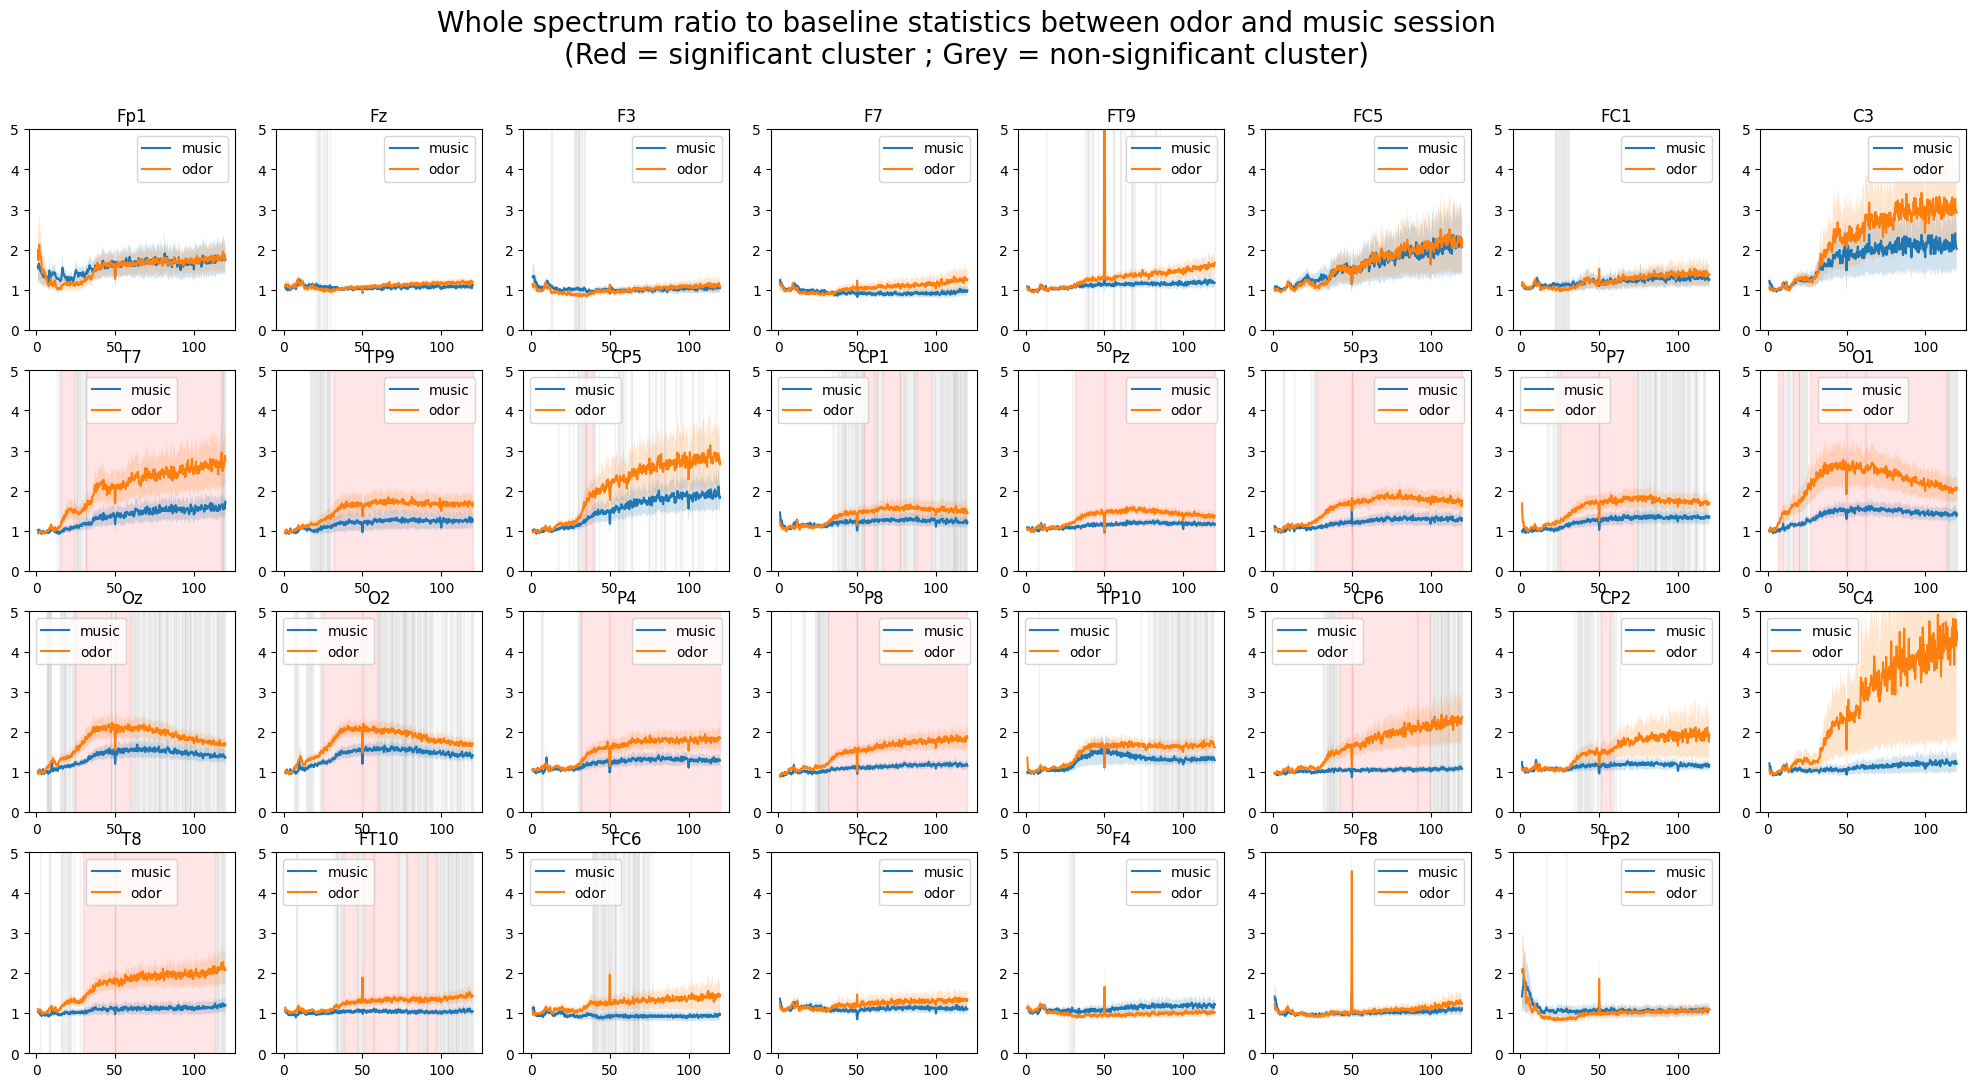

In [159]:
f_start = 1
f_stop = 120

chans = psds['chan'].values

nrows = 4
ncols = 8

fig, axs = plt.subplots(nrows = nrows, ncols= ncols, figsize = (25,12))
fig.suptitle('Whole spectrum ratio to baseline statistics between odor and music session\n(Red = significant cluster ; Grey = non-significant cluster)', fontsize = 20)

i = 0

for r in range(nrows):
    for c in range(ncols):
        ax = axs[r,c]
        
        if r == nrows-1 and c == ncols-1:
            ax.set_visible(False)
        else:
            chan = chans[i]
            i = i+1
            x1 = psds.sel(chan =chan , freq = slice(f_start, f_stop), session = 'music')
            x2 = psds.sel(chan =chan , freq = slice(f_start, f_stop), session = 'odor')
            t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(x1.values-x2.values, out_type = 'indices', verbose = False)

            ax.set_title(chan)
            for cond, x in zip(['music','odor'],[x1, x2]):
                sem = scipy.stats.sem(x, axis = 0)
                f = x['freq'].values
                m =  x.mean('participant').values
                ax.plot(f,m, label = cond)
                ax.fill_between(f, m-sem, m+sem, alpha = 0.2)
                ax.set_ylim(0,5)

                for cluster, p  in zip(clusters,cluster_p_values):
                    cluster = cluster[0]
                    if p < 0.05:
                        c = 'r'
                    else:
                        c = 'grey'
                    ax.axvspan(f[cluster[0]], f[cluster[-1]], alpha = 0.05, color = c)
            ax.legend()
fig.savefig(base_folder / 'Figures' / 'bandpower' /  'global' / 'whole_spectrum_stats.png', dpi = 300 ,bbox_inches = 'tight')
plt.show()

In [140]:
# f_start = 0.5
# f_stop = 100

# x1 = psds.sel(freq = slice(f_start, f_stop), session = 'music').transpose('participant','freq','chan')
# x2 = psds.sel(freq = slice(f_start, f_stop), session = 'odor').transpose('participant','freq','chan')
# t_obs, clusters, cluster_p_values, H0 = mne.stats.permutation_cluster_1samp_test(x1.values-x2.values, out_type = 'indices', verbose = True)